In [ ]:
#from warnings import filterwarnings
#filterwarnings("ignore")

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,scale, RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve, classification_report,mean_squared_error,f1_score,recall_score,precision_score
import time
from joblib import dump, load

In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [ ]:
pima = pd.read_csv('/content/diabetes.csv') #proses load database

In [ ]:
pima.head() #membaca database 5 teratas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.describe() #menampilkan kolom dengan deskripsi kolom

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pima.info() #melakukan cek kolom, bars, tipe data, dan index yang ada di dalam dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pima.duplicated().sum() #parameter mengecek duplikasi pada database

0

In [ ]:
pima.isnull().sum() #parameter cek niai null pada database

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
pima.dtypes #mengecek tipedata pada setiap kolom

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
X = pima.drop("Outcome",axis=1)
y= pima["Outcome"] #We will predict Outcome(diabetes)

In [ ]:
#melakukan pembagian data
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [ ]:
decision_tree = DecisionTreeClassifier().fit(X_train,y_train)

In [ ]:
decision_tree

DecisionTreeClassifier()

In [ ]:
decision_tree.get_params() #pengecekan parameter dan kedalaman data

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
decision_tree.get_n_leaves()

109

In [ ]:
decision_tree.get_depth()

14

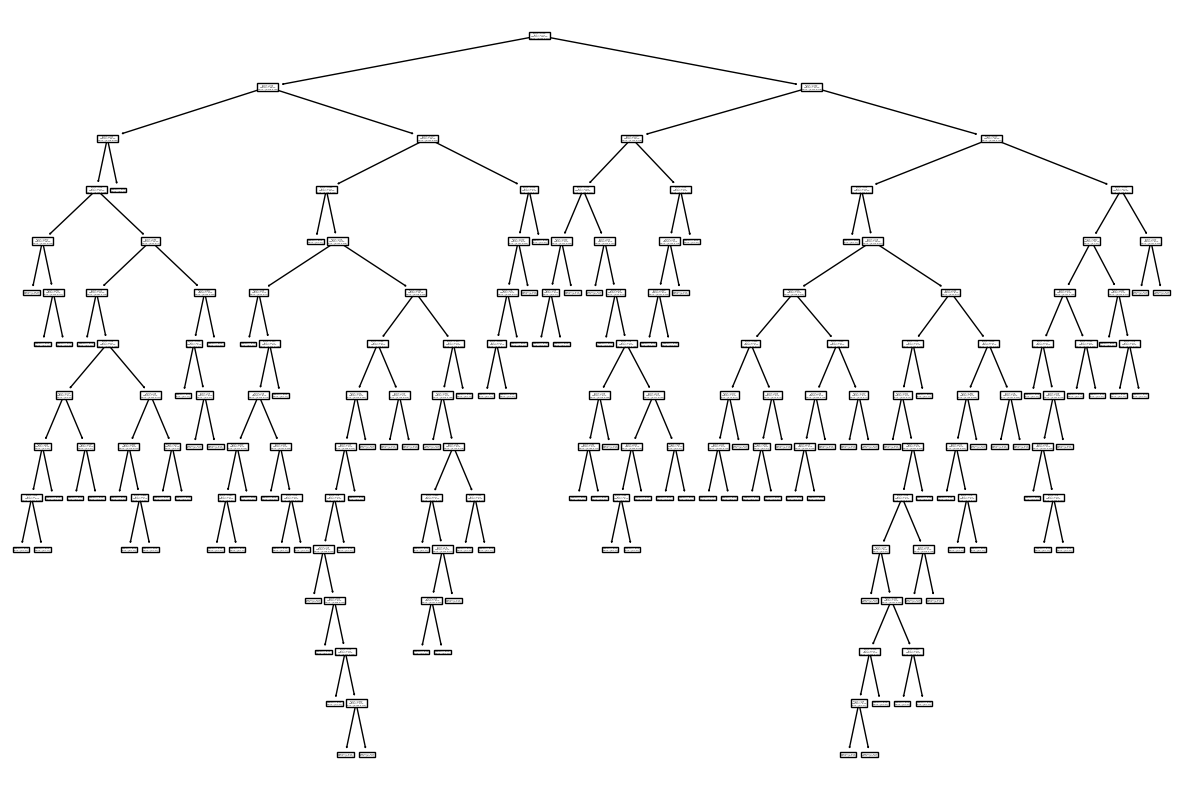

In [ ]:
plt.figure(figsize=(15,10)) #bentuk pohon keputusan decision tree
plot_tree(decision_tree,proportion=True);

In [ ]:
decision_tree

DecisionTreeClassifier()

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[80, 28],
       [22, 38]])

In [ ]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7023809523809523


In [ ]:
accuracy_score(y_test,y_pred)

0.7023809523809523

In [ ]:
accuracy_score(y_test,y_pred)

0.7023809523809523

In [ ]:
precision_score(y_test,y_pred)

0.5757575757575758

In [ ]:
f1_score(y_test,y_pred)

0.6031746031746033

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       108
           1       0.58      0.63      0.60        60

    accuracy                           0.70       168
   macro avg       0.68      0.69      0.68       168
weighted avg       0.71      0.70      0.71       168



<Axes: >

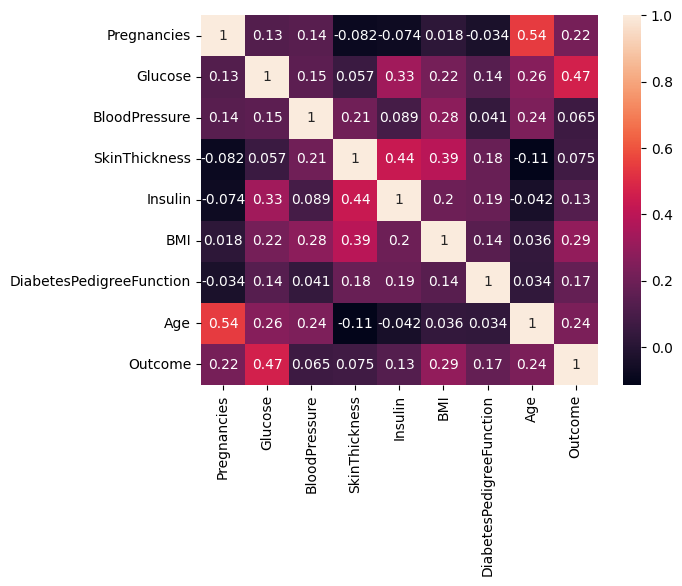

In [ ]:
#confussion matrix
corr=pima.corr() #penghitungam matrix korelasi
sns.heatmap(corr, annot=True) #memvisualisaikan dalam heatmap menggunakan library seaborn